In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Makeover Monday 2020 W7 –– World Wealth

For this week's challenge, we are looking at global wealth by nation and continent.

Source Article: [All the World's Wealth in One Visual](https://howmuch.net/articles/distribution-worlds-wealth-2019)

Data Source: [Credit Suisse](https://www.credit-suisse.com/)

Makeover Monday Data: [data.world](https://data.world/makeovermonday/2020w7)

## Data Analysis

### Loading the Data:

In [2]:
df = pd.read_excel('WorldWealth.xlsx')

### First Look at Data:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
Country        214 non-null object
Region         206 non-null object
Wealth ($B)    205 non-null object
dtypes: object(3)
memory usage: 5.1+ KB


We have some missing values in the data and the wealth column is read as a string.

In [4]:
df.head()

,Country,Region,Wealth ($B)
0,United States,North America,"$105,990"
1,China,China,"$63,827"
2,Japan,Asia-Pacific,"$24,992"
3,Germany,Europe,"$14,660"
4,United Kingdom,Europe,"$14,341"


The wealth column cannot be read as integers with the dollar signs and commas. We need to remove those. China is also strangely listed as a region.

In [5]:
df.describe()

,Country,Region,Wealth ($B)
count,214,206,205
unique,214,7,142
top,Lebanon,Asia-Pacific,$2
freq,1,63,11


The 7 region division should be verified given the China region.

### Data Cleaning:

#### Fixing the null values

In [6]:
# looking into missing values
df[df.isnull().any(axis=1)]

,Country,Region,Wealth ($B)
97,Bosnia and Herzegovina,NaN,NaN
98,Europe,NaN,NaN
154,Northern Mariana Islands,NaN,NaN
155,Asia-Pacific,NaN,NaN
195,Central African Republic,NaN,NaN
196,Africa,NaN,NaN
203,St. Vincent and the Grenadines,NaN,NaN
204,Latin America,NaN,NaN
213,Venezuela,Latin America,NaN


These values will be removed since they have no information. We could alternatively look online for the proper values, but for the pruposes of this exercise, I'll stick to the given dataset.

In [7]:
# drop empty wealth rows
df1 = df.dropna().copy()

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 212
Data columns (total 3 columns):
Country        205 non-null object
Region         205 non-null object
Wealth ($B)    205 non-null object
dtypes: object(3)
memory usage: 6.4+ KB


The missing values have been removed.

#### Fixing the wealth column

In [8]:
# Remove the '$' and ',' from wealth column
df1['Wealth ($B)'] = df1['Wealth ($B)'].str.replace(',', '')
df1['Wealth ($B)'] = df1['Wealth ($B)'].str.replace('$', '')

df1.head()

,Country,Region,Wealth ($B)
0,United States,North America,105990
1,China,China,63827
2,Japan,Asia-Pacific,24992
3,Germany,Europe,14660
4,United Kingdom,Europe,14341


In [9]:
# convert to a numeric column
df1['Wealth ($B)'] = pd.to_numeric(df1['Wealth ($B)'])

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 212
Data columns (total 3 columns):
Country        205 non-null object
Region         205 non-null object
Wealth ($B)    205 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


The wealth column has been successfully made into a numeric column.

#### Fixing regions

In [10]:
# check unique region values
df1['Region'].unique()

array(['North America', 'China', 'Asia-Pacific', 'Europe', 'India',
       'Latin America', 'Africa'], dtype=object)

China and India are listed as regions. They need to be regrouped.

In [11]:
# fixing regions
df1.replace({'Region': {'China': 'Asia-Pacific', 'India': 'Asia-Pacific'}}, inplace = True)

df1['Region'].unique()

array(['North America', 'Asia-Pacific', 'Europe', 'Latin America',
       'Africa'], dtype=object)

China and India have been put into Asia-Pacific.

### Summary Statistics

In [12]:
df1.describe(include = 'all')

,Country,Region,Wealth ($B)
count,205,205,205.000000
unique,205,5,NaN
top,Lebanon,Asia-Pacific,NaN
freq,1,65,NaN
mean,NaN,NaN,1758.409756
std,NaN,NaN,9010.680069
min,NaN,NaN,0.000000
25%,NaN,NaN,12.000000
50%,NaN,NaN,64.000000
75%,NaN,NaN,377.000000


The data covers 205 countries from 5 regions. The minimum national wealth in billions of dollars is 0, the mean is 1758.41 with a standard deviation of 9010.68, the median is 64, and the max is 105990.

### Initial Graph:

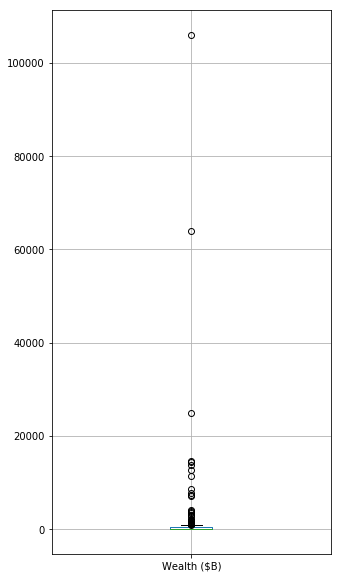

In [13]:
fig = df1.boxplot(figsize=(5,10))

The boxplot is difficult to interpret given the dominance of outliers.

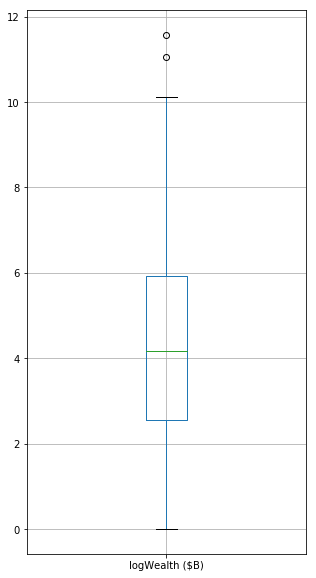

In [14]:
df_trns = df1.copy()

df_trns['logWealth ($B)'] = np.log1p(df_trns['Wealth ($B)'])

fig2 = df_trns.boxplot('logWealth ($B)', figsize=(5,10))

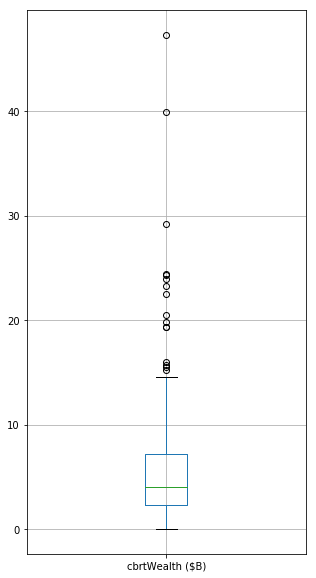

In [15]:
df_trns['cbrtWealth ($B)'] = np.cbrt(df_trns['Wealth ($B)'])

fig3 = df_trns.boxplot('cbrtWealth ($B)', figsize=(5,10))

### Data Exploration:

#### Group by region distributions

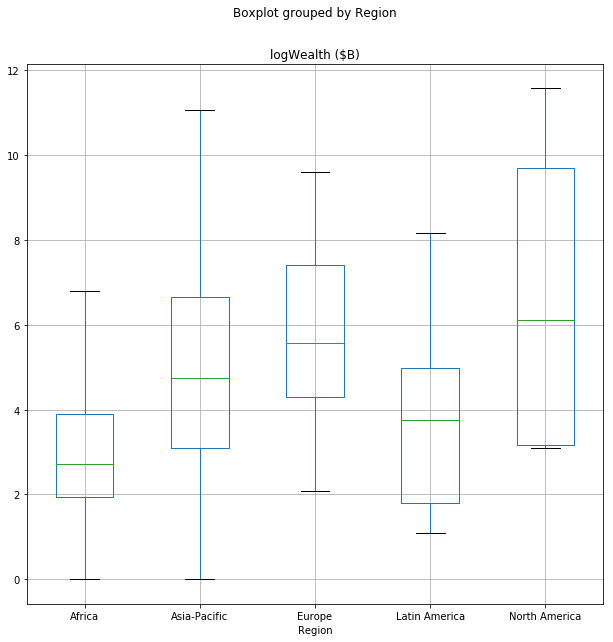

In [16]:
fig4 = df_trns.boxplot(column=['logWealth ($B)'], 
                       by='Region', 
                       figsize=(10,10))

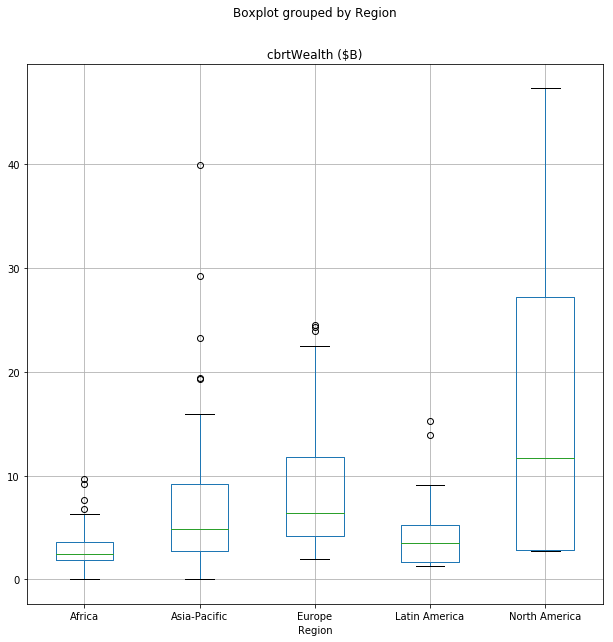

In [17]:
fig5 = df_trns.boxplot(column=['cbrtWealth ($B)'], 
                       by='Region', 
                       figsize=(10,10))

In [18]:
df1[['Region', 'Wealth ($B)']].groupby('Region').describe()

Wealth ($B)                                                   \
                    count          mean           std   min    25%     50%   
Region                                                                       
Africa               53.0     77.641509    174.071945   0.0   6.00    14.0   
Asia-Pacific         65.0   2172.323077   8569.326297   0.0  21.00   114.0   
Europe               46.0   1970.586957   3891.894909   7.0  72.75   265.0   
Latin America        37.0    267.675676    716.341246   2.0   5.00    42.0   
North America         4.0  28651.750000  51716.168609  21.0  22.50  4298.0   

                                   
                    75%       max  
Region                             
Africa            48.00     898.0  
Asia-Pacific     775.00   63827.0  
Europe          1646.00   14660.0  
Latin America    145.00    3535.0  
North America  32927.25  105990.0

There is a substantial difference in the means of each region. The mean wealth of North America countries is more than 350x that of mean African countries. However, North America only has 4 countries and is mostly distorted by the United States. We can see that the median country in North America is about 15% that of the mean. Europe and Asia-Pacific also have substantially greater means and distributions than Latin America and Africa. 

#### Group by regions percent of whole

In [19]:
df_agg = df1.groupby(['Region']).sum().reset_index()

df_agg

,Region,Wealth ($B)
0,Africa,4115
1,Asia-Pacific,141201
2,Europe,90647
3,Latin America,9904
4,North America,114607


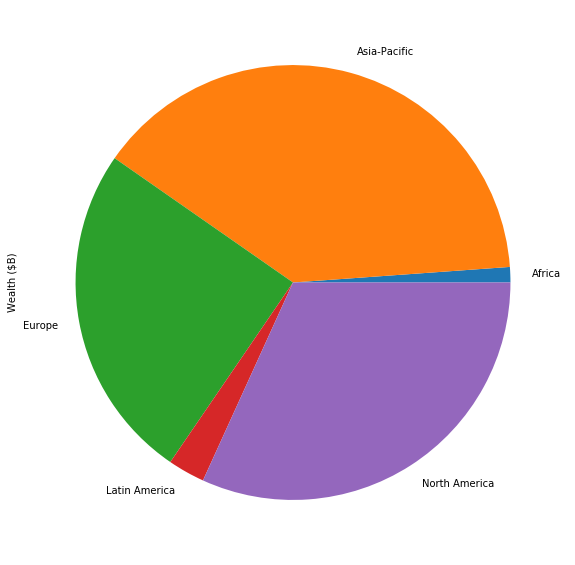

In [20]:
fig6 = df_agg.plot.pie(y='Wealth ($B)',
                       labels = df_agg['Region'].tolist(),
                       figsize=(10, 10),
                       legend=None)

North America, Asia Pacific, and Europe each hold about a third while Africa and Latin America hold very small portions. The pie chart offers a stronger impression of the way wealth is distributed across regions; the boxplots suffer from strong data transformations that improve readability at the cost of some simplicity. 

#### Dominating outliers

In [21]:
# Group by Region
df_top5 = df1.groupby('Region').apply(
    # Sort grouped values and return the top 8
    lambda x: x.sort_values(by = 'Wealth ($B)', ascending=False).head(8)
).reset_index(drop=True)

df_top5

,Country,Region,Wealth ($B)
0,Egypt,Africa,898
1,South Africa,Africa,770
2,Nigeria,Africa,443
3,Morocco,Africa,305
4,Algeria,Africa,252
5,Kenya,Africa,249
6,Ethiopia,Africa,163
7,Tunisia,Africa,112
8,China,Asia-Pacific,63827
9,Japan,Asia-Pacific,24992


Considering the previously collected means (Africa: ~\\$80B, Asia-Pacific: ~\\$2,200B, Europe: ~\\$2,000B, Latin America: ~\\$300B, North America: ~\\$29,000B), this list reveals a number of the countries whose economies dominate the region. Notably, Egypt, China, Japan and Brazil all perform more than 10x better their respective regional averages. Because North America contains so few countries, the United States dominates the mean. Europe seems distinct because the top wealth is split among the top handful of countries.

#### Separating dominating outliers from the rest

In [22]:
# Group by Region
df_top3 = df1.groupby('Region').apply(
    lambda x: x.replace(
        # Sort grouped values and sum all below top 3, rename that sum Other
        x.sort_values(by = 'Wealth ($B)', ascending=False)['Country'][3:].tolist(), 'Other'
    ).groupby('Country').sum()
).reset_index()

# North America has only 4 countries, we want to keep the 4th Greenland not Other
df_top3.at[18, 'Country'] = 'Greenland'

df_top3

,Region,Country,Wealth ($B)
0,Africa,Egypt,898
1,Africa,Nigeria,443
2,Africa,Other,2004
3,Africa,South Africa,770
4,Asia-Pacific,China,63827
5,Asia-Pacific,India,12614
6,Asia-Pacific,Japan,24992
7,Asia-Pacific,Other,39768
8,Europe,France,13729
9,Europe,Germany,14660


Separating out the top outliers in each region gives us a sense of which countries are dominating globally, regionally, and also how the remainder of the region looks in contrast.

### Deeper Data Graph:

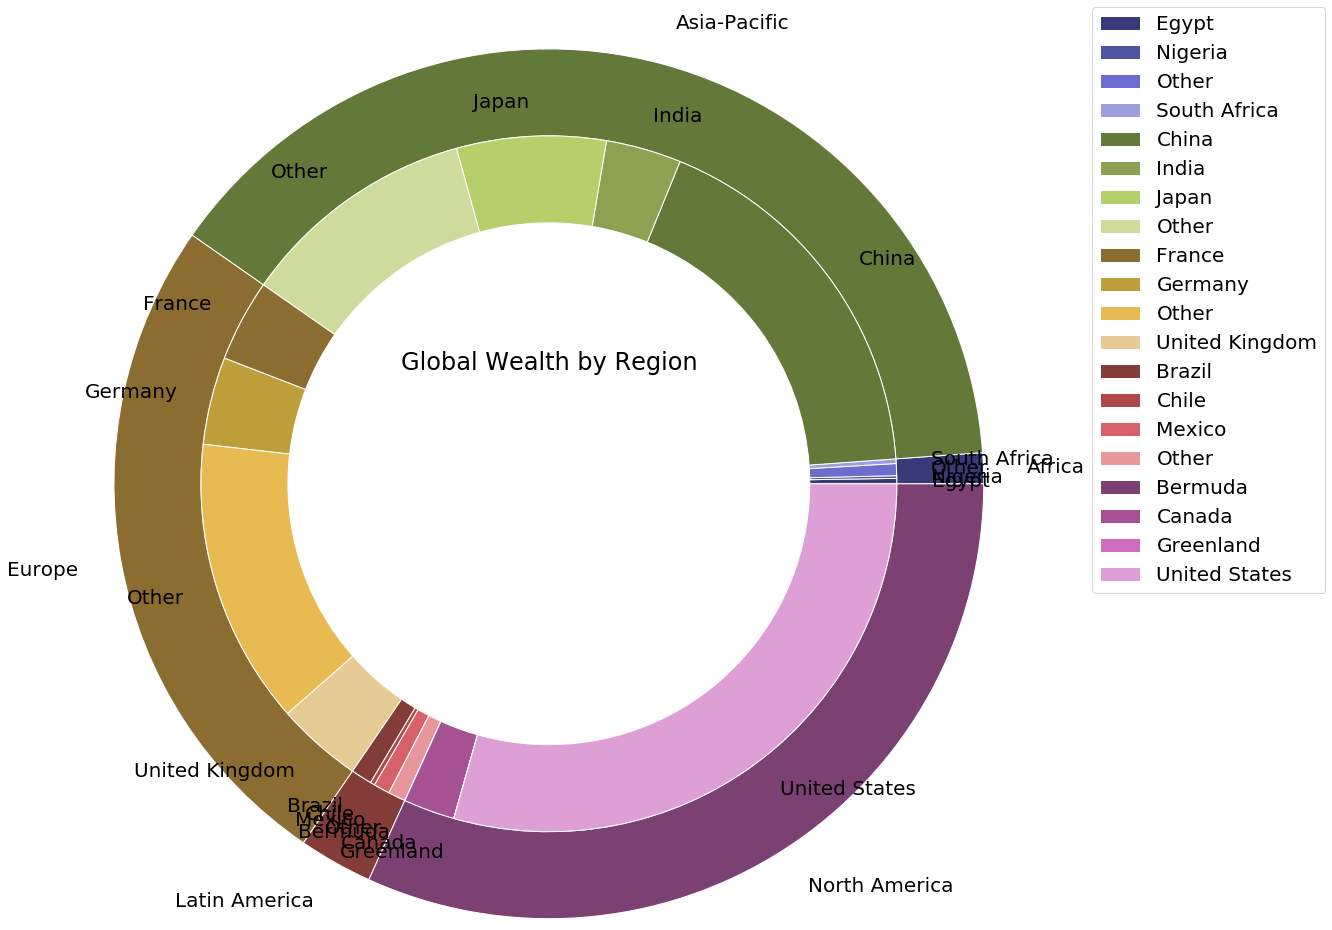

In [31]:
fig_final, ax = plt.subplots()

size = 1
vals = np.array([[60., 32.], [37., 40.], [29., 10.], [60., 40.], [100., 10.]])

# set up colormap -- outer colors are first of each section, inner are shades
cmap = plt.get_cmap("tab20b")
outer_colors = cmap(np.arange(5)*4)
inner_colors = cmap(np.arange(20))

# outer pie chart
pie_outer, _ = ax.pie(df_agg['Wealth ($B)'], 
                      radius=5, 
                      colors=outer_colors, 
                      labels = df_agg['Region'].tolist(),
                      wedgeprops=dict(width=size, edgecolor='w'))

# inner pie chart
pie_inner, _ = ax.pie(df_top3['Wealth ($B)'], 
                      radius=5-size, 
                      colors=inner_colors, 
                      labels = df_top3['Country'].tolist(), 
                      wedgeprops=dict(width=size, edgecolor='w'))

handles, labels = ax.get_legend_handles_labels()

# only include countries in legend
ax.legend(handles[5:], labels[5:], loc=(3, 0))

ax.set(title='Global Wealth by Region')
plt.show()

In [32]:
fig_final.savefig('pyplot_WorldWealth.png', bbox_inches='tight')

### Tableau Graph:

My Tableau graph is published [here](https://public.tableau.com/views/2020W6-US_Wartime_Living/USWartimeLife?:display_count=y&publish=yes&:origin=viz_share_link).